(vis-narrative)=
# Narrative Data Visualisation

## Introduction

In this chapter, we'll examine the tricks and techniques of *narrative data visualisation*. This type of visualisation gets a lot more press than the others discussed in {ref}`vis-intro` ; literally, because journalists use it in their work. There are many books written on it too. 

For narrative visualisation, it's particularly helpful to bear this quote in mind:

> The purpose of visualisation is insight, not pictures

—Ben Shneiderman, populariser of the highlighted text link

Narrative data visualisation requires the most thought in the step where you go from the first view to the end product. It's a visualisation that doesn't just show a picture, but gives an insight.

Let's import the packages we'll need for the rest of the chapter.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import warnings

# Ignore warnings just for this chapter
warnings.filterwarnings("ignore")

In [27]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)


# Set max rows displayed for readability
pd.set_option("display.max_rows", 6)

## Narrative Data Visualisation

As discussed, the name of the game here is to communicate a particular narrative. Let's see what tricks we can use to help do this. The three stages of this are: deciding the story, deciding the chart, and creating a chart that helps deliver that narrative.

### Deciding the story

We are only human, and a digestible narrative goes a lot further than lots of data with no thread running through. If you are doing narrative visualisation, you must first be clear about the story you want to tell and why it's important. Let's say you are making a visualisation on topic 'Y', then some reasons why 'Y' might be important that you may want to think about when creating your narrative are:

- Y matters: when Y rises or falls, people are hurt or helped.
- Y is puzzling: it defies easy explanation.
- Y is controversial or political: some argue one thing while others say another.
- Y is big (like the service sector) or common (like traffic jams).
- Y helps someone do something they could not do before.

If you can identify why a story is important, you're half way to designing a narrative visualisation that brings the story into focus. Later on, we'll recreate a chart from the *Financial Times*. In that case, 'Y' is a high for air pollution in Beijing that hurts people (it's also political because of efforts to tackle the problem). So, in this case, the creator of the narrative needs to convey that the pollution has hit a high (presumably relative to other points in time) and that this high is far above safe levels.

### What plot should I use?

Once you know what story you want to tell, you need the right kind of chart for the job. Resources like the *Financial Times*' [visual vocabulary](http://ft-interactive.github.io/visual-vocabulary/) are extremely useful here. You need to ask yourself what element you're trying to highlight: a point in time, the size relative to other units cross-sectionally, the distribution either in numbers or spatially, the difference between groups, how something has changed, etc.? There are charts that can help with all of these and it's well worth looking at the link to get a sense. You can find code for many of the plots that are featured in the {ref}`vis-common-plots` chapter.

### Drawing Attention to Enhance Narrative Visualisation

According to data visualisation master Jon Schwabish's book *Better Data Visusalizations* {cite:t}`schwabish2021better`, there are 15 ways to draw an audience's attention in a chart:

1. Shape
2. Enclosure
3. Line width
4. Saturation
5. Colour
6. Size
7. Markings
8. Orientation
9. Position
10. Sharpness
11. Length
12. 3D
13. Curvature
14. Density
15. Closure

Sometimes people add a 16th entry to this list, Connection.

![Preattentive Visual Processing, by @jschwabish.](https://github.com/aeturrell/coding-for-economists/raw/main/img/preattentive.png) The different ways to trigger preattentive visual processing, by @jschwabish.

But be warned: not all of these are equivalent! It's much easier to perceive differences in length than it is differences in, say, volume. So if you want your audience to be able to make comparisons or quantitative assessments, you need to pick what techniques you use from this list carefully. Roughly in order of how easy they are to perceive quantitatively, the features are: one common axis, two axes, length, slope, angle, parts of whole, area, volume, saturation, and hue.

## Case Studies in Narrative Visualisation

Good visualisation helps the viewer to grasp the narrative—rather than leaving them puzzling as to what the key message is. To that end, various adornments may be added to a plot to bring out the narrative. These adornments typically take the form of those we have seen already that draw the eye, but for a successful narrative visualisation they must come together to tell a story.

We'll also make use of some other tricks:

- Text annotations, which can be a useful addition to a chart because they further enhance the narrative.

- Declutter the graph, removing lines that aren't helping frame the story

- Use the title to tell the story, and put the y-axis label horizontally below

- Use faded text for text that isn't contributing directly to the narrative

- If there are multiple lines, label them directly rather than via a legend

### The Financial Times

Let's see an example that brings together quite a few of these elements, recreating a chart from the *Financial Times*: a newspaper that is well-known for its impressive visualisations. The chart tells the story of extremely high levels of air pollution in Beijing at the start of 2021. (Note that the data here disagree with the original Financial Times source, which were unavailable; do not take the numbers too seriously.)

Let's first grab the data:

In [28]:
df = pd.read_csv(
    "https://github.com/aeturrell/coding-for-economists/raw/main/data/beijing_pm.csv",
)
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
# Restrict to time scale of interest
df = df[(df.index >= "2020-02-28") & (df.index <= "2021-03-01")]
df.head()

,pm25
date,
2020-02-28,102.857143
2020-02-29,103.285714
2020-03-01,123.571429
2020-03-02,118.142857
2020-03-03,108.142857


Now let's get on to the figure. The code that generates individual parts of the chart is annotated to explain what it's doing.

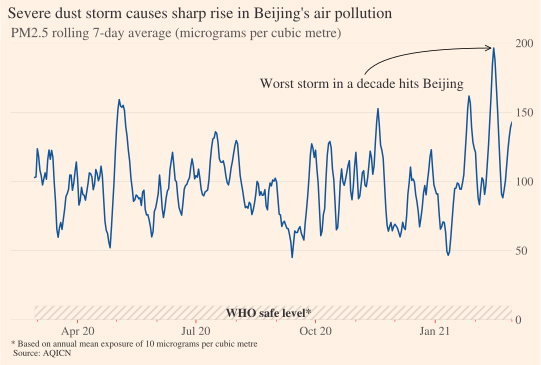

In [29]:
# set a level for fading some elements of the plot
fade_alpha = 0.8

fig, ax = plt.subplots(figsize=(9, 5))
# Plot a line
ax.plot(df.index, df["pm25"], lw=1.5, color="#12549a")
# Title that gives the narrative
plt.suptitle(
    "Severe dust storm causes sharp rise in Beijing's air pollution",
    size=16,
    ha="left",
    x=0.12,
)
# Horizontal y-axis title, faded
ax.set_title(
    "PM2.5 rolling 7-day average (micrograms per cubic metre)",
    loc="left",
    size=14,
    alpha=fade_alpha,
)
# Time is obvious, so no x-label needed: instead annotate sources
ax.set_xlabel(
    "* Based on annual mean exposure of 10 micrograms per cubic metre \n Source: AQICN",
    loc="left",
    size=9,
    alpha=fade_alpha,
)
# remove chart clutter
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(axis="y", which="both", length=0)
ax.tick_params(axis="x", which="both", color=[1, 0, 0, fade_alpha])
# set aesthetically pleasing limits
ax.set_ylim(0, 200)
ax.set_xlim(None, df.index.max())
# for time series, tick marks on the right help give a sense of right-ward motion
ax.yaxis.tick_right()
# create grid only in y-direction, so viewer can judge level-but with few ticks
ax.yaxis.set_major_locator(ticker.MaxNLocator(4))
ax.grid(which="major", axis="y", lw=0.2)
# add minor ticks for months, x-axis
ax.xaxis.set_minor_locator(mdates.MonthLocator())
# major ticks for quarters, x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=3))
# label x-axis in Jan 01 format at major ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
# add an annotation to the "news" here, the latest peak. Use an arrow.
ax.annotate(
    "Worst storm in a decade hits Beijing",
    xy=(df.idxmax(), df.max()),
    xycoords="data",
    xytext=(-30, -40),
    textcoords="offset points",
    ha="right",
    size=14,
    arrowprops=dict(arrowstyle="->", connectionstyle="angle3"),
)
# Add a hatch, with a label, that represents the WHO safe level: this helps
# put the current rise in context
ax.fill_between(
    x=df.index,
    y1=0,
    y2=10,
    hatch="///",
    facecolor="None",
    linewidth=0.1,
    alpha=0.2,
)
ax.annotate(
    "WHO safe level*",
    fontweight="heavy",
    xy=(0.6, 0.01),
    xycoords="axes fraction",
    xytext=(0, 0),
    textcoords="offset points",
    ha="right",
    size=12,
)
# Use the FT background colours
fig.set_facecolor("#fff1e4")
ax.set_facecolor("#fff1e4")
# faded tick labels
ax.tick_params(axis="both", which="both", labelsize=12)
plt.setp(ax.get_xticklabels(), alpha=fade_alpha)
plt.setp(ax.get_yticklabels(), alpha=fade_alpha)
plt.show()

What do we learn from this exercise? Well, there's a big last mile issue with making narrative visualisations. Normally, when coding, you should do your best to avoid hard-coding numbers (for example `x=0.15` above). But in this case getting things just so requires a lot of manual adjustment and that's *after* you've decided what story you're going to tell, and how to show it.

The example above demonstrates many of the pain points of the last mile, like decluttering, adjusting text, careful use of saturation and colour, and ensuring dates are displayed in an aesthetically pleasing way.

### Direct Labelling of Lines

One commonly used trick that we didn't see in the above example is labelling lines directly (rather than using a legend).

#### Labelling Line Ends

So let's now see an example of labelling line ends that was originally posted on the [Library of Statistical Translation](https://lost-stats.github.io/Presentation/Figures/line_graph_with_labels_at_the_beginning_or_end.html).

In [30]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/LOST-STATS/LOST-STATS.github.io/master/Presentation/Figures/Data/Line_Graph_with_Labels_at_the_Beginning_or_End_of_Lines/Research_Nobel_Google_Trends.csv",
    parse_dates=["date"],
)
df.head()

,date,hits,geo,keyword,name
0,2019-09-21,1,world,physics nobel,Physics
1,2019-09-22,1,world,physics nobel,Physics
2,2019-09-23,1,world,physics nobel,Physics
3,2019-09-24,1,world,physics nobel,Physics
4,2019-09-25,1,world,physics nobel,Physics


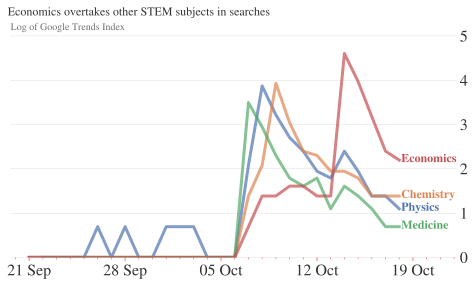

In [31]:
fade_alpha = 0.7

# Create the column we wish to plot
title = "Log of Google Trends Index"
df[title] = np.log(df["hits"])
df = df.dropna(subset=[title])

# Make a plot
fig, ax = plt.subplots()

# Add lines to it
sns.lineplot(
    ax=ax,
    data=df,
    x="date",
    y=title,
    hue="name",
    palette="deep",
    legend=None,
    hue_order=df["name"].unique(),
    alpha=fade_alpha,
)
# Add the text--for each line, find the end, annotate it with a label, and
# adjust the chart axes so that everything fits on.
for line, name in zip(ax.lines, df["name"].unique()):
    y = line.get_ydata()[-1]  # NB: to use start value, set [-1] to [0] instead
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y = next(reversed(line.get_ydata()[~line.get_ydata().mask]), float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue
    text = ax.annotate(
        name,
        xy=(x, y),
        xytext=(2, -2),
        color=line.get_color(),
        xycoords=(ax.get_xaxis_transform(), ax.get_yaxis_transform()),
        textcoords="offset points",
        fontweight="bold",
    )
    text_width = (
        text.get_window_extent(fig.canvas.get_renderer())
        .transformed(ax.transData.inverted())
        .width
    )
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

# Title that gives the narrative
plt.suptitle(
    "Economics overtakes other STEM subjects in searches",
    size=12,
    ha="left",
    x=0.12,
)
# Horizontal y-axis title, faded
ax.set_title(
    title,
    loc="left",
    size=10,
    alpha=fade_alpha,
)
ax.set_xlabel("")
ax.set_ylabel("")
# remove chart clutter
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(axis="y", which="both", length=0)
ax.tick_params(axis="x", which="both", color=[1, 0, 0, fade_alpha])
# Format the date axis to be prettier.
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))
# for time series, tick marks on the right help give a sense of right-ward motion
ax.yaxis.tick_right()
ax.grid(which="major", axis="y", lw=0.2)
ax.set_ylim(0, None)
plt.show()

#### Labelling On Lines 

Another powerful way to remove the need for a legend is to put labels directly on the lines. Here's an example from the online book [*Scientific Visualization in Matplotlib*](https://github.com/rougier/scientific-visualization-book) {cite:t}`rougier2021scientific`.

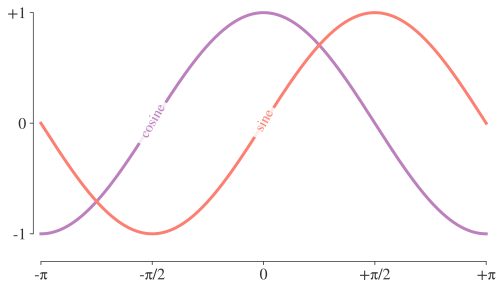

In [32]:
def plot_helper_func(ax, X, C, S):
    ax.set_xlim([-np.pi, np.pi])
    ax.set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
    ax.set_xticklabels(["-π", "-π/2", "0", "+π/2", "+π"])
    ax.set_ylim([-1, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_yticklabels(["-1", "0", "+1"])

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_position(("data", -3.25))
    ax.spines["bottom"].set_position(("data", -1.25))

    (plot1,) = ax.plot(X, C, label="cosine", clip_on=False, lw=3)
    (plot2,) = ax.plot(X, S, label="sine", clip_on=False, lw=3)

    return plot1, plot2

X = np.linspace(-np.pi, np.pi, 400, endpoint=True)
C, S = np.cos(X), np.sin(X)

kw_settings = dict(
    size="large",
    bbox=dict(facecolor="white", edgecolor="None", alpha=0.85),
    ha="center",
    va="center",
    rotation=60)

fig, ax = plt.subplots()

plot1, plot2 = plot_helper_func(ax, X, C, S)
ax.text(
    X[100],
    C[100],
    " " + plot1.get_label(),
    color=plot1.get_color(),
    **kw_settings,
)
ax.text(
    X[200],
    S[200],
    " " + plot2.get_label(),
    color=plot2.get_color(),
    **kw_settings,
);


### The Economist

This example comes from a blog post called [Making Economist-Style Plots in Matplotlib](https://towardsdatascience.com/making-economist-style-plots-in-matplotlib-e7de6d679739) by Robert Ritz. Our objective is to recreate a plot from *The Economist*.

In terms of narrative bells and whistles, this chart uses a less is more approach. But this is on purpose; there's very little chart clutter so all we see is the order of GDP levels.

We'll use the [Varta](https://fonts.google.com/specimen/Varta) font, which is somewhat similar to the proprietary font used by *The Economist*. If you are going to use a custom font for a chart, you need to either download and install it on your system or tell **matplotlib** where the file is (we'll use the former approach below).

The data is from the World Bank and is available using the code NY.GDP.MKTP.CD.


In [33]:
from pandas_datareader import wb
from datetime import datetime

end_year = datetime.now().year
countries = ["GBR", "USA", "CHN", "IND", "FRA", "CAN", "KOR", "DEU", "ITA"]
df = wb.download(indicator='NY.GDP.MKTP.CD', country=countries, start=end_year-2, end=end_year)
df = df.reset_index()
df.head()

,country,year,NY.GDP.MKTP.CD
0,Canada,2021,1.990762e+12
1,Canada,2020,1.645423e+12
2,China,2021,1.773406e+13
3,China,2020,1.468767e+13
4,Germany,2021,4.223116e+12


Let's do some quick tidying and prep of the data ready for plotting.

In [34]:
df["gdp_trillions"] = df["NY.GDP.MKTP.CD"]/1e12

gdp = df[df['year'] == df["year"].max()].sort_values(by='gdp_trillions').tail(9)
gdp.head()

,country,year,NY.GDP.MKTP.CD,gdp_trillions
14,"Korea, Rep.",2021,1.798534e+12,1.798534
0,Canada,2021,1.990762e+12,1.990762
12,Italy,2021,2.099880e+12,2.099880
6,France,2021,2.937473e+12,2.937473
10,India,2021,3.173398e+12,3.173398


Before making the chart, let's set the font:

In [35]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Varta'

Now let's make the chart. Note that we need to paint on the red rectangle and, to get everything in just the right spot, specify some points individually.

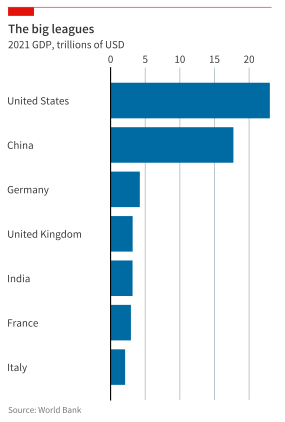

In [38]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(3, 6))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)
# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)

# Setup data
gdp['country'] = gdp['country'].replace('the United States', 'United States')
gdp_bar = gdp[gdp['year'] == gdp['year'].max()].sort_values(by='gdp_trillions')[-7:]

# Plot data
ax.barh(gdp_bar['country'], gdp_bar['gdp_trillions'], color='#006BA2', zorder=2, lw=0)

# Set custom labels for x-axis
labels = np.arange(0, 25, 5)
ax.set_xticks(labels)
ax.set_xticklabels(labels)

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit
# Reformat y-axis tick labels
ax.set_yticklabels(gdp_bar['country'],      # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

leftmost_pos = -0.35
top_most_point = 1.02
# Add in line and tag
ax.plot([leftmost_pos, .87],                 # Set width of line
        [top_most_point, top_most_point],    # Set height of line
        transform=fig.transFigure,           # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle(
        (leftmost_pos, top_most_point),                 # Set location of rectangle by lower left corder
                           0.12,                        # Width of rectangle
                           -0.02,                       # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=leftmost_pos,
        y=.96,
        s="The big leagues",
        transform=fig.transFigure,
        ha='left',
        fontsize=13,
        weight='bold')
ax.text(x=leftmost_pos,
        y=.925,
        s=f"{gdp['year'].max()} GDP, trillions of USD",
        transform=fig.transFigure,
        ha='left',
        fontsize=11)
# Set source text
ax.text(x=leftmost_pos, y=.08, s="Source: World Bank",
        transform=fig.transFigure, ha='left', fontsize=9,
        alpha=.7)

plt.show()
